# What does *app-mediated-fertility* look like?

What does *app-mediated-fertility* look like? Research site is Google Play.

In [476]:
import pandas as pd
import numpy as np
import skimage, skimage.io, skimage.exposure, skimage.color
import matplotlib.pyplot as plt
import matplotlib_venn
import urllib
import urllib3
import ipywidgets
import IPython.display
import re

%matplotlib inline

We started by defining three issues, or perhaps described as *concerns*, via reflection and based on earlier theoretical work. This is our query design for *search as research* (Rogers, 2017).

We selected three separate terms as starting points.

In [90]:
issues = ['ovulation', 'fertility', 'period_calendar']

Then we went to the public user interface of [Google Play](https://play.google.com) using research browsers on the desktop computers. A fast intuition easily allows working hypothesis that the icons are very pink.

The screenshots below are reproduced post facto, not in a research browser. As a research note, performing *search as research* should maybe be done on the mobile, which would be closer to the design, and user experience of Google Play.

'fertility'

![](fertility in google play.png)

'ovulation'

![](ovulation in google play.png)

'period calendar'

![](period calendar in google play.png)

Intuitively, this stands in contrast to 'exercise'

![](exercise in google play.png)

or 'health'

![](health in google play.png)

For each of our three queries, we selected three topmost results, and used them as seeds for the Google Play recommendation engine. Then we used the Digital Methods Initiative [Google Play Similar Apps](https://wiki.digitalmethods.net/Dmi/ToolGooglePlaySimilar) tool to extract recommendations as CSV files (well actually TSV).

In [9]:
ovulation = pd.read_csv("like_ovulation.csv", "\t", index_col='id')
fertility = pd.read_csv("like_fertility.csv", "\t", index_col="id")
period_calendar = pd.read_csv("like_period_calendar.csv", "\t", index_col="id")

ovulation.shape, fertility.shape, period_calendar.shape

((140, 20), (142, 20), (136, 20))

A little UI for browsing through the logos, and calculate color channel summaries about them.

In [425]:
def showIcon(change):
    index = change.new
    # OBS hardcoded dataset here
    # OBS reads from the network lol
    if(fertility.iloc[index].img_src_small.startswith('//')):
        icon = skimage.io.imread("https:" + fertility.iloc[index].img_src_small)
    else:
        icon = skimage.io.imread(fertility.iloc[index].img_src_small)

    print(fertility.iloc[index].name)
    print('r:', np.mean(icon[:, :, 0]) - np.mean(icon),
    'g:', np.mean(icon[:, :, 1]) - np.mean(icon),
    'b:', np.mean(icon[:, :, 2]) - np.mean(icon))

    skimage.io.imshow(icon)

Widget Javascript not detected.  It may not be installed or enabled properly.


com.smsrobot.period
r: 6.10641868512 g: -41.8253460208 b: 2.63600346021


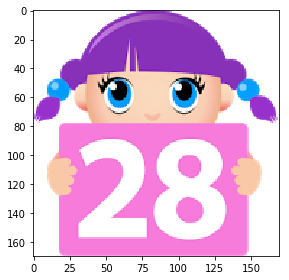

com.glow.android
r: -31.8655190311 g: -51.3018512111 b: 33.3088754325


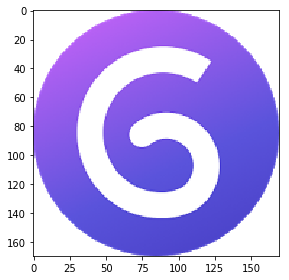

com.phonegap.getpregnant
r: 21.6952364475 g: -8.12158016148 b: -13.573656286


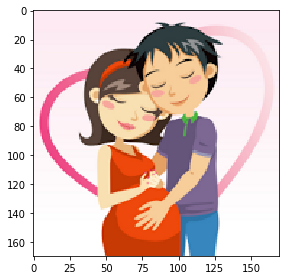

com.cg.android.ptracker
r: 10.5946020761 g: -9.00065743945 b: -13.1328373702


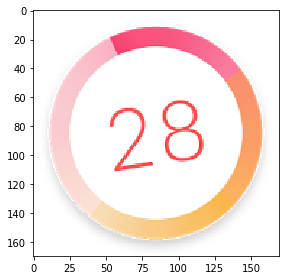

In [429]:
iSlider = ipywidgets.IntSlider(min=0, max=len(fertility))
iSlider.observe(showIcon, names="value")
IPython.display.display(iSlider)

Retrieve all the icons to local files.

In [431]:
for issue in issues:
    data = pd.read_csv("like_" + issue + ".csv", sep="\t")
    for index, r in data.iterrows():
        url = r['img_src_small']
        if(url.startswith("//")):
            url = "https:" + url

        filename = r['id'] + ".png"
        filepath = "like_" + issue + "_icons/" + filename
        print(r['id'])
        try:
            urllib.request.urlretrieve(url, filepath);
        except urllib.error.URLError as e:
            print(e.reason)

org.iggymedia.periodtracker
com.popularapp.periodcalendar
com.clue.android
com.period.tracker.lite
in.plackal.lovecyclesfree
com.lbrc.PeriodCalendar
com.glow.android.eve
com.woman.diary
com.womanlog
com.nosotrasonline.micalendiario
com.zmobile.calendarfree
com.zmobile.calendar
com.smsrobot.period
com.linchpin.myperiodtracker
com.pepapp
constant.milk.periodapp
com.period.tracker.deluxe
com.dnt7.threeW
mobi.bestracker.getbaby
com.veevapps.loseweightin30days
com.grupoprecedo.calendariomenstrual
pl.bella.kalendarzyk
miracle.women.calendar
com.glow.android
com.cg.android.ptracker
com.sleekbit.ovuview
com.popularapp.thirtydayfitnesschallenge
net.android.wzdworks.magicday
org.nanobit.perioddiary
com.alt12.pinkpadpro
com.ladytimer.ovulationcalendar
com.roidgame.MaybeBaby
com.ecare.ovulationcalculator
com.bayer.ch.Elevit
mmapps.bmi.calculator
com.ela.android
com.basti12354.bikinibody
jp.kirei_r.sp.diary_free
com.brc.PeriodTrackerDiary
com.chris.mydays
com.guillaumegranger.mc
com.porknbunny.pcal

com.sec.android.app.shealth
com.lbrc.PeriodCalendar
com.smsrobot.period
com.popularapp.periodcalendar
org.iggymedia.periodtracker
com.clue.android
com.ladytimer.ovulationcalendar
com.period.tracker.lite
com.brc.PeriodTrackerDiary
com.guillaumegranger.mc
com.ecare.ovulationcalculator
in.plackal.lovecyclesfree
com.ecare.menstrualdiary
com.hp.pregnancy.lite
com.smsrobot.periodlite
com.woman.diary
com.glow.android.eve
com.nosotrasonline.micalendiario
com.pepapp
com.womanlog
com.cbgsolutions.mfprotrial
com.zmobile.calendarfree
com.ovuline.fertility
com.zmobile.calendar
com.linchpin.myperiodtracker
com.indhay.menstrualcalendar
app.drlady
com.period.tracker.deluxe
com.phonegap.getpregnant
com.veevapps.loseweightin30days
ru.mobiledimension.kbr
com.cg.android.ptracker
pl.bella.kalendarzyk
com.grupoprecedo.calendariomenstrual
com.ldf.ovulation.view
miracle.women.calendar
org.nanobit.perioddiary
com.popularapp.thirtydayfitnesschallenge
com.alt12.pinkpadpro
mon.calculateur.menstruel
mmapps.bmi.cal

Next, read all the icons from files into memory, separated by issues.

In [92]:
ovulation_icons = [skimage.io.imread("like_ovulation_icons/" + id + ".png") for id in ovulation.index]
fertility_icons = [skimage.io.imread("like_fertility_icons/" + id + ".png") for id in fertility.index]
period_calendar_icons = [skimage.io.imread("like_period_calendar_icons/" + id + ".png") for id in period_calendar.index]

The below normalizes to average luminosity, which is not unproblematic because *pink* kind of means *red* + *white*.

In [12]:
def medianchannels(image):
    imgmedian = np.median(image)
    return [np.median(image[:, :, ch]) - imgmedian for ch in [0, 1, 2]]

In [93]:
ovulation_medianchannels = pd.DataFrame([medianchannels(icon) for icon in ovulation_icons], columns=["red", "green", "blue"], index=ovulation.index)
fertility_medianchannels = pd.DataFrame([medianchannels(icon) for icon in fertility_icons], columns=["red", "green", "blue"], index=fertility.index)
period_calendar_medianchannels = pd.DataFrame([medianchannels(icon) for icon in period_calendar_icons], columns=["red", "green", "blue"], index=period_calendar.index)

In [94]:
ovulation_medianchannels['filename'] = ovulation_medianchannels.index + ".png"
fertility_medianchannels['filename'] = fertility_medianchannels.index + ".png"
period_calendar_medianchannels['filename'] = period_calendar_medianchannels.index + ".png"

In [108]:
ovulation_medianchannels['rating'] = ovulation.rating
fertility_medianchannels['rating'] = fertility.rating
period_calendar_medianchannels['rating'] = period_calendar.rating

In [211]:
ovulation_medianchannels['published'] = ovulation.published
fertility_medianchannels['published'] = fertility.published
period_calendar_medianchannels['published'] = period_calendar.published

In [109]:
ovulation_medianchannels.to_csv("ovulation_medianrgb.csv", sep="\t")
fertility_medianchannels.to_csv("fertility_medianrgb.csv", sep="\t")
period_calendar_medianchannels.to_csv("period_calendar_medianrgb.csv", sep="\t")

Next (manually) produce plots of redness vs. app rating with [ImagePlot](http://lab.softwarestudies.com/p/imageplot.html), open the plots in PhotoShop, make the background transparent, and save to PNG files with transparency.

Ovulation
<img src="ovulation-median normalized redness vs rating.png" width="200">

Fertility
<img src="fertility-median normalized redness vs rating.png" width="200">

Period calendar
<img src="period calendar-median normalized redness vs rating.png" width="200">

A [little tool](rednessvsratingui/index.html) helps compare these three image plots, superimposed one on top of the other.

Let's compose a concatenation of all the three issues, ie. seed lists, to one larger superset.

In [423]:
allissues_medianchannels = pd.concat([ovulation_medianchannels, fertility_medianchannels, period_calendar_medianchannels])
allissues_medianchannels.shape

(418, 6)

Deduplicate to a set, because the three sets of recommendations from the Google Play recommendation engine partially overlap.

In [424]:
allissues_medianchannels = allissues_medianchannels[~allissues_medianchannels.index.duplicated(keep='first')]
allissues_medianchannels.shape

(117, 6)

Read output file of ImagePlot's `imageMeasure.txt` script, and take a look at it's shape.

In [301]:
allissues_imageMeasure = pd.read_csv("allissues-imageMeasure.csv", sep="\t", index_col='filename')
allissues_imageMeasure.index = allissues_imageMeasure.index.map(lambda i: i.replace(".png", ""))
allissues_imageMeasure.head()

,imageID,brightness_median,brightness_stdev,saturation_median,saturation_stdev,hue_median,hue_stdev
filename,,,,,,,
app.drlady,1,255,10.3236,0,84.5862,0,103.7591
appinventor.ai_created4each.My_Diary,2,245,38.2387,4,59.3514,21,107.8585
cc.hayah.rosycalc,3,255,20.4930,190,72.0076,237,67.2021
cl.facemama.gestograma,4,210,30.8042,93,34.3542,146,51.4265
co.quanyong.pinkbird,5,247,16.3329,151,76.0223,249,82.8806


Add app publication years, because ImagePlot does not know what to do about date strings like those above. A more fine-grained temporal dimension would be welcome, perhaps by month. But is this interesting?

In [303]:
allissues_medianchannels['year'] = allissues_medianchannels.published.apply(lambda l: dateutil.parser.parse(l).year)

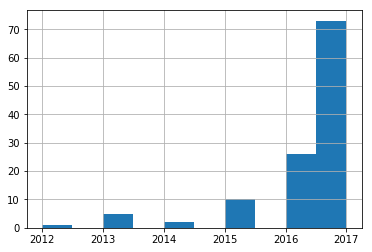

In [297]:
allissues_medianchannels.year.hist()

Inspecting visually, we see that apps for app-mediated-fertility have been on the rise. What's the background baseline signal of app publication, though? Should be investigated.

In [304]:
allissues_medianchannels = allissues_medianchannels.join(allissues_imageMeasure[['brightness_median', 'saturation_median', 'hue_median']])

Ok let's see what do we have at this stage.

In [307]:
allissues_medianchannels.sample(5)

,red,green,blue,filename,rating,published,year,brightness_median,saturation_median,hue_median
id,,,,,,,,,,
com.softorbits,34.0,-30.0,-47.0,com.softorbits.png,4.1,"November 14, 2014",2014,253,82,0
ru.fedr.pregnancy,-14.0,-49.0,-87.0,ru.fedr.pregnancy.png,4.7,"June 8, 2017",2017,137,134,15
com.chris.mydays,0.0,0.0,0.0,com.chris.mydays.png,4.6,"June 20, 2017",2017,255,0,0
com.chris.android.mydaysfree,-4.0,-160.0,-39.0,com.chris.android.mydaysfree.png,4.7,"June 28, 2017",2017,255,0,0
com.glow.android,-58.0,-83.0,56.0,com.glow.android.png,4.6,"June 23, 2017",2017,237,154,172


In [305]:
allissues_medianchannels.to_csv("allissues.csv", sep="\t")

The original data from Google Play recommendation engine lacks URI schemas for some of the icons. With querying the Google Vision API in mind, let's fix the URIs. This should maybe have been done earlier in the data processing pipeline.

In [312]:
def fixurl(string):
    url = string
    if(url.startswith("//")):
           url = "https:" + url
    return url

In [368]:
alldata = pd.concat([fertility, ovulation, period_calendar])
alldata = alldata[~alldata.index.duplicated(keep='first')]
alldata['id'] = alldata.index # lol wow, this is for modified memespector, because I suck at PHP
alldata['img_src_small'] = alldata['img_src_small'].apply(fixurl)
alldata['img_src_large'] = alldata['img_src_large'].apply(fixurl)
print(alldata.shape)
alldata.sample(3)

(117, 21)


,title,category,rating,price,link,developer_name,developer_link,img_src_large,img_src_small,description,...,num_downloads,published,filesize,software,os,pegi,rating_count,developer_address,related_to,id
id,,,,,,,,,,,,,,,,,,,,,
com.wFERTILITYOVULATIONCALCULATOR_4815602,FERTILITY OVULATION CALCULATOR,Medical,5.0,free,https://play.google.com/store/apps/details?id=...,CHECK EXPO DEVELOPERS,https://play.google.com/store/apps/developer?i...,https://lh3.googleusercontent.com/g7UPORZbsBZn...,https://lh3.googleusercontent.com/g7UPORZbsBZn...,"Voorspellen wanneer u ovuleert, save dagen e...",...,"1,000 - 5,000","April 13, 2017",NaN,"5,1.1",2.3 and up,PEGI 3,8,NaN,com.ovuline.fertility,com.wFERTILITYOVULATIONCALCULATOR_4815602
appinventor.ai_created4each.My_Diary,Mijn agenda,Lifestyle,4.5,free,https://play.google.com/store/apps/details?id=...,Created4each,https://play.google.com/store/apps/dev?id=6705...,https://lh3.googleusercontent.com/63jX_dKjdTrT...,https://lh3.googleusercontent.com/63jX_dKjdTrT...,Uw veilige agenda van geheimen over password...,...,"1,000,000 - 5,000,000","June 26, 2017",NaN,7.2,2.3 and up,PEGI 3,132759,NaN,com.popularapp.periodcalendar,appinventor.ai_created4each.My_Diary
com.wifi.sheday,SheDay - Period Tracker,Health & Fitness,4.6,free,https://play.google.com/store/apps/details?id=...,SheDay Dev,https://play.google.com/store/apps/developer?i...,https://lh3.googleusercontent.com/iAY0KG80WBAY...,https://lh3.googleusercontent.com/iAY0KG80WBAY...,Laten we beginnen met het bijhouden van uw t...,...,"10,000 - 50,000","April 7, 2017",NaN,1.4.1,4.0.3 and up,PEGI 3,128,NaN,com.glow.android,com.wifi.sheday


Persist to file

In [369]:
alldata.to_csv('alldata.csv', sep="\t")

...manual interlude here for running the [memespector](https://github.com/dentoir/memespector) PHP interface thing. Research automation opportunity here, to either run the tool from this environment, or rewrite interface code which isn't too hard to do.

After some configuration and setup, the [memespector](https://github.com/dentoir/memespector) tool automates querying the Google Vision API, and creates a copy of the input CSV file with the Vision API results added into a column. Operating with the cached JSON responses would be sweeter perhaps, because *memespector* output some loses data and creates hierarchical, comma and parenthesis separated data structures inside the CSV, which are a hassle to unravel with Pandas.

In [365]:
alldata_withgv = pd.read_csv("processed_alldata.csv", sep="\t", index_col="id")

In [366]:
alldata_withgv.sample(3)

,title,category,rating,price,link,developer_name,developer_link,img_src_large,img_src_small,description,...,gv_ss_adult,gv_ss_spoof,gv_ss_medical,gv_ss_violence,gv_tags,gv_web_entities,gv_web_full_matching_images,gv_web_partial_matching_images,gv_web_visually_similar_images,gv_web_pages_with_matching_images
id,,,,,,,,,,,,,,,,,,,,,
com.clue.android,Period Tracker Clue: Period & Ovulation Tracker,Health & Fitness,4.7,free,https://play.google.com/store/apps/details?id=...,BioWink GmbH,https://play.google.com/store/apps/developer?i...,https://lh3.googleusercontent.com/wVwz3A1WC__i...,https://lh3.googleusercontent.com/wVwz3A1WC__i...,Beoordeeld als top gratis menstruele volgen ...,...,VERY_UNLIKELY,VERY_UNLIKELY,UNLIKELY,VERY_UNLIKELY,"yellow(0.95795465),text(0.89403987),font(0.869...","Mobile app(0.86621),Fertility(0.4021),Ovia Fer...",http://ndl.mgccw.com/mu3/app/20161212/10/14815...,http://www.4androidapk.net/data/programs/image...,https://lh3.googleusercontent.com/V5grU6gmFgce...,https://www.appannie.com/en/apps/google-play/t...
com.tracker.periodcalendar,My Period Tracker,Health & Fitness,4.0,free,https://play.google.com/store/apps/details?id=...,My Period Tracker,https://play.google.com/store/apps/developer?i...,https://lh3.googleusercontent.com/SRzpRaFGW3__...,https://lh3.googleusercontent.com/SRzpRaFGW3__...,De meest accurate: voorspellingen zijn gebas...,...,VERY_UNLIKELY,VERY_UNLIKELY,UNLIKELY,VERY_UNLIKELY,"yellow(0.95795465),text(0.89403987),font(0.869...","Mobile app(0.86621),Fertility(0.4021),Ovia Fer...",http://ndl.mgccw.com/mu3/app/20161212/10/14815...,http://www.4androidapk.net/data/programs/image...,https://lh3.googleusercontent.com/V5grU6gmFgce...,https://www.appannie.com/en/apps/google-play/t...
com.womanlog,WomanLog kalender,Health & Fitness,4.5,free,https://play.google.com/store/apps/details?id=...,Pro Active App,https://play.google.com/store/apps/dev?id=7533...,https://lh3.googleusercontent.com/o_mEOw2lohLN...,https://lh3.googleusercontent.com/o_mEOw2lohLN...,Kalender voor vrouwen. Wat iedere vrouw nodi...,...,VERY_UNLIKELY,VERY_UNLIKELY,UNLIKELY,VERY_UNLIKELY,"yellow(0.95795465),text(0.89403987),font(0.869...","Mobile app(0.86621),Fertility(0.4021),Ovia Fer...",http://ndl.mgccw.com/mu3/app/20161212/10/14815...,http://www.4androidapk.net/data/programs/image...,https://lh3.googleusercontent.com/V5grU6gmFgce...,https://www.appannie.com/en/apps/google-play/t...


In [483]:
apptags = alldata_withgv['gv_tags'].apply(lambda l: [re.sub('\(.*', '', e) for e in l.split(',')])
apptags.sample(3)

id
doug.nasc.fertilalarmpt         [yellow, text, font, product design, line]
com.ovuline.fertility           [yellow, text, font, product design, line]
com.grex.pregnancycalculator    [yellow, text, font, product design, line]
Name: gv_tags, dtype: object

Now, given Google Vision API results, let's start to inspect which by reversing the index from app→tags to tag→apps.

Totally running short on time here, so crappy practices LOL.

In [497]:
import os
import json
import pprint

In [498]:
jsonfiles = os.listdir("memespector-master/cache")
annotationsPerApp = {}

for f in jsonfiles:
    with open("memespector-master/cache/" + f) as fd:
        j = json.load(fd)
        descriptions = [a['description'] for a in j['responses'][0]['labelAnnotations']]
        app = f.replace('.json', '')
        for d in descriptions:
            if(d not in annotationsPerApp):
                annotationsPerApp[d] = [app]
            else:
                annotationsPerApp[d].append(app)

pprint.pprint(annotationsPerApp)

{'abdomen': ['ru.fedr.pregnancy'],
 'aqua': ['com.ginefiv.quedateembarazada',
          'com.ovuline.pregnancy',
          'constant.milk.periodapp'],
 'area': ['cl.facemama.gestograma',
          'com.amikulich.pregnancycalculator',
          'com.AvvaStyle.femalecalendar',
          'com.brc.PeriodTrackerDiary',
          'com.cg.android.ptracker',
          'com.sleekbit.ovuview',
          'mobi.bestracker.getbaby'],
 'arm': ['com.wFERTILITYOVULATIONCALCULATOR_4815602'],
 'audio': ['com.ecare.ovulationcalculator',
           'com.ultimategamestudio.musicforpregnancy'],
 'audio equipment': ['com.ultimategamestudio.musicforpregnancy'],
 'azure': ['com.ovuline.pregnancy'],
 'barbie': ['me.magicgirl.magicgirl'],
 'beauty': ['com.andromo.dev466637.app555138',
            'com.cbgsolutions.mfprotrial',
            'com.jacek.miszczyk.pregnancytestLite'],
 'blond': ['me.magicgirl.magicgirl'],
 'blue': ['com.ginefiv.quedateembarazada',
          'com.glow.android',
          'com.smsrobot.

ah deadline it's 15:00 and time to present

# References

Richard Rogers (2017). “Foundations of Digital Methods: Query Design,” in Mirko Tobias Schäfer and Karin van Es (eds.), *The Datafied Society: Studying Culture through Data*. Amsterdam: Amsterdam University Press, 75-94.